Objective

Analyze how trading behavior (profitability, risk, volume, leverage) aligns or diverges from
overall market sentiment (fear vs greed). Identify hidden trends or signals that could influence
smarter trading strategies


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df1= pd.read_csv('/content/fear_greed_index (1).csv')
df2=pd.read_csv('/content/historical_data (1).csv')

In [3]:
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [7]:
df1.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [8]:
df2.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


Step 1. Data Cleaning & Formatting

In [9]:
# For df1 (sentiment dataset)
df1['date'] = pd.to_datetime(df1['date'])

# For df2 (trader dataset) - Timestamp IST is string, convert to datetime
df2['Timestamp IST'] = pd.to_datetime(df2['Timestamp IST'], format="%d-%m-%Y %H:%M")

# Optional: create just a "date" column for grouping
df2['date'] = df2['Timestamp IST'].dt.date
df2['date'] = pd.to_datetime(df2['date'])


Step 2. Exploratory Data Analysis (EDA)

<Axes: title={'center': 'Distribution of Sentiment (Fear vs Greed)'}, xlabel='classification'>

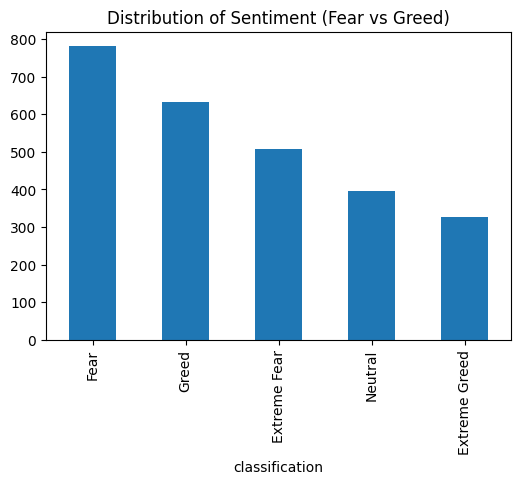

In [10]:
df1['classification'].value_counts().plot(kind='bar', figsize=(6,4), title="Distribution of Sentiment (Fear vs Greed)")


<Axes: title={'center': 'Total Daily Trade Volume (USD)'}, xlabel='date'>

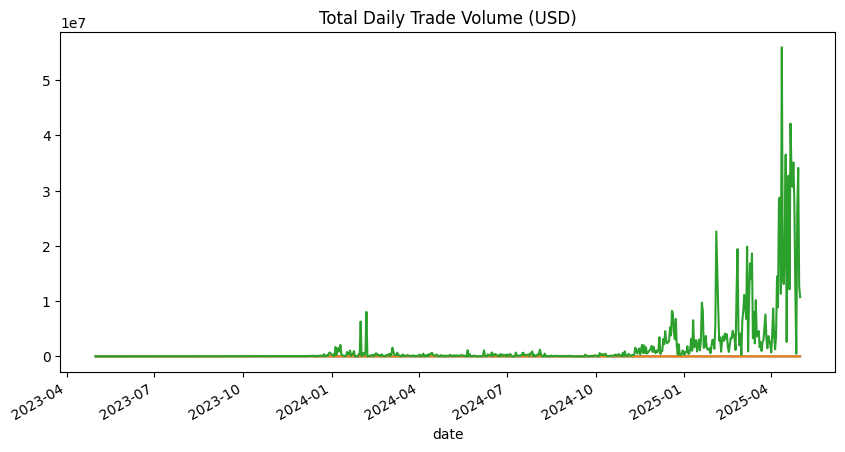

In [12]:
# Daily trade counts
df2.groupby('date').size().plot(figsize=(10,5), title="Number of Trades per Day")

# Daily average PnL
df2.groupby('date')['Closed PnL'].mean().plot(figsize=(10,5), title="Average Daily Closed PnL")

# Daily traded volume (USD)
df2.groupby('date')['Size USD'].sum().plot(figsize=(10,5), title="Total Daily Trade Volume (USD)")


In [13]:
# Merge daily trader stats with sentiment
daily_trades = df2.groupby('date').agg({
    'Closed PnL': 'mean',
    'Size USD': 'sum',
    'Account': 'count'   # number of trades
}).reset_index().rename(columns={'Account': 'Num_Trades'})

# Add sentiment classification
merged_daily = pd.merge(daily_trades, df1[['date','classification','value']], on='date', how='left')
merged_daily.head()


,date,Closed PnL,Size USD,Num_Trades,classification,value
0,2023-05-01,0.000000,477.00,3,Greed,63.0
1,2023-12-05,0.000000,50005.83,9,Extreme Greed,75.0
2,2023-12-14,-18.675885,113203.35,11,Greed,72.0
3,2023-12-15,-12.316017,10609.95,2,Greed,70.0
4,2023-12-16,0.000000,15348.77,3,Greed,67.0


In [14]:
merged_daily.groupby('classification')['Closed PnL'].mean()


,Closed PnL
classification,
Extreme Fear,38.433903
Extreme Greed,56.736108
Fear,31.276567
Greed,39.412175
Neutral,63.820699


In [15]:
merged_daily.groupby('classification')['Size USD'].mean()


,Size USD
classification,
Extreme Fear,8.177447e+06
Extreme Greed,1.091800e+06
Fear,5.311261e+06
Greed,1.495246e+06
Neutral,2.690180e+06


In [16]:
merged_daily.groupby('classification')['Num_Trades'].mean()


,Num_Trades
classification,
Extreme Fear,1528.571429
Extreme Greed,350.807018
Fear,679.527473
Greed,260.637306
Neutral,562.477612


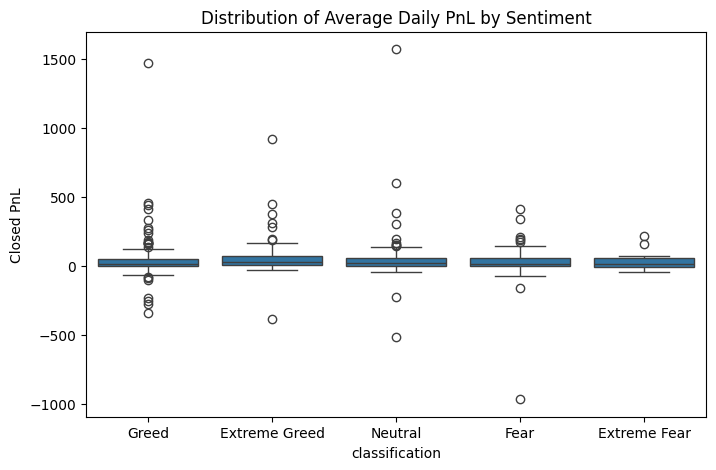

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Closed PnL', data=merged_daily)
plt.title("Distribution of Average Daily PnL by Sentiment")
plt.show()


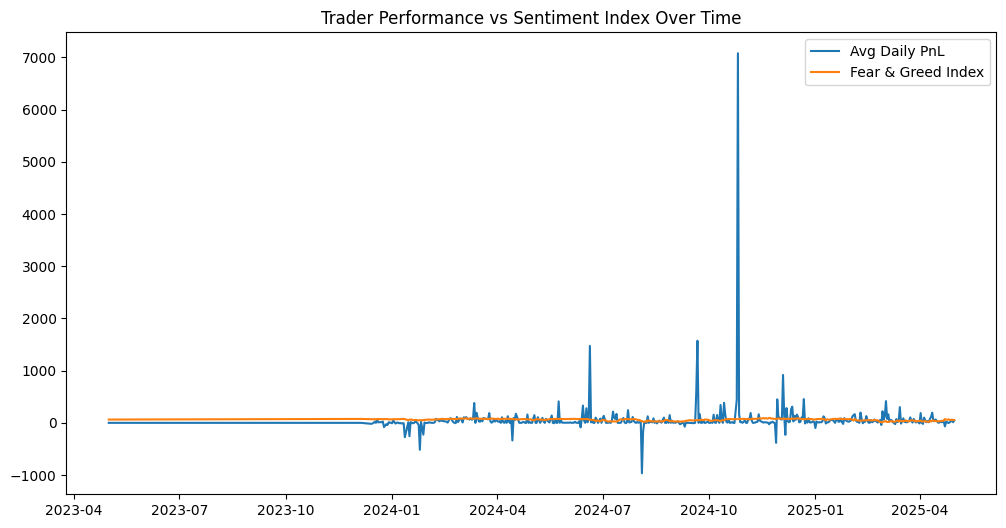

In [18]:
plt.figure(figsize=(12,6))
plt.plot(merged_daily['date'], merged_daily['Closed PnL'], label="Avg Daily PnL")
plt.plot(merged_daily['date'], merged_daily['value'], label="Fear & Greed Index")
plt.legend()
plt.title("Trader Performance vs Sentiment Index Over Time")
plt.show()


Visualize Number of Trades & Volume by Sentiment:

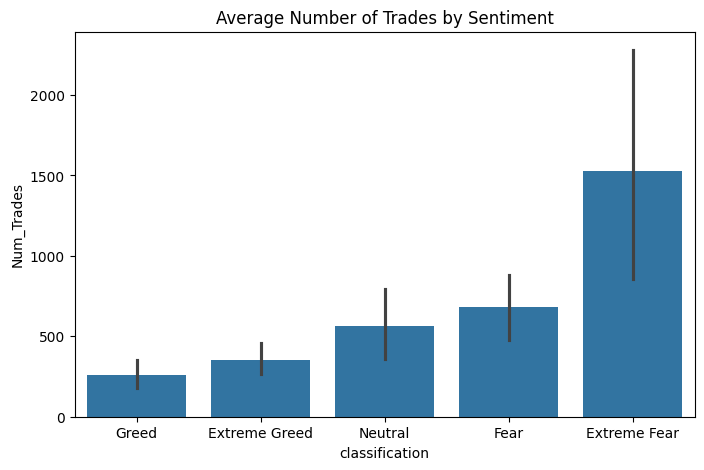

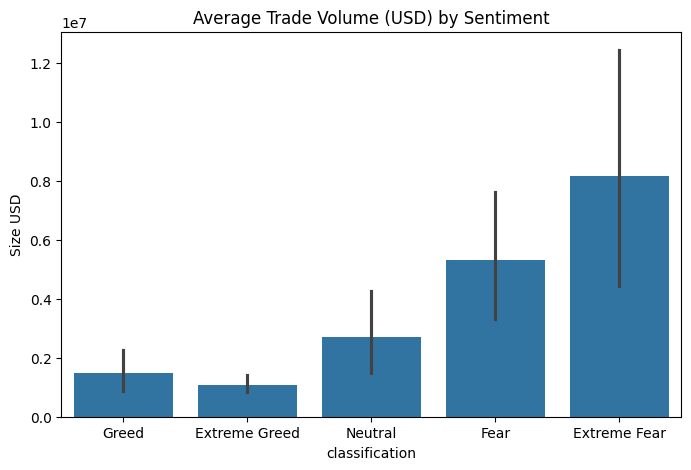

In [20]:

plt.figure(figsize=(8,5))
sns.barplot(x='classification', y='Num_Trades', data=merged_daily, estimator=np.mean)
plt.title("Average Number of Trades by Sentiment")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='classification', y='Size USD', data=merged_daily, estimator=np.mean)
plt.title("Average Trade Volume (USD) by Sentiment")
plt.show()


Compare PnL trends across sentiments

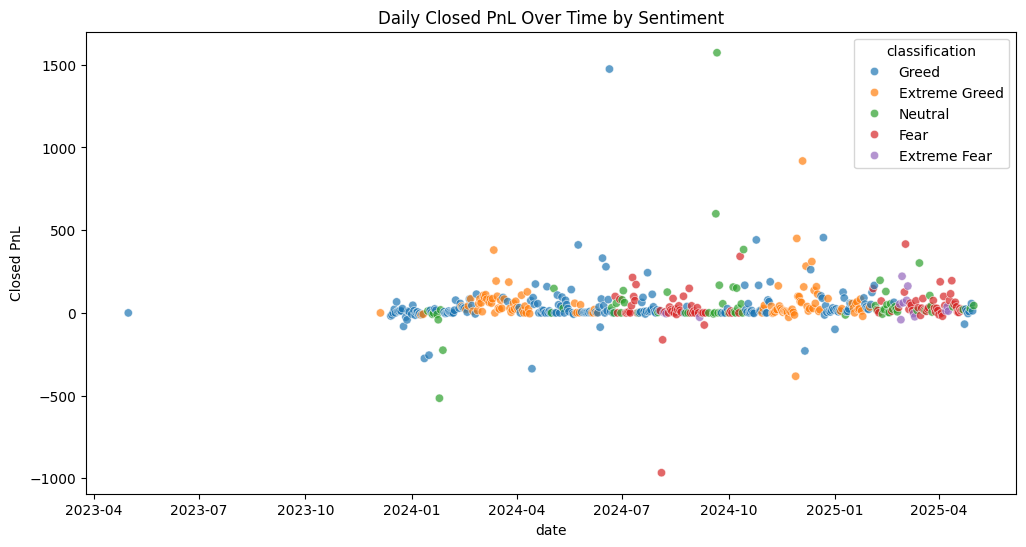

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='date', y='Closed PnL', hue='classification', data=merged_daily, alpha=0.7)
plt.title("Daily Closed PnL Over Time by Sentiment")
plt.show()


p-value = 0.56 (> 0.05), the result means:
 The average Closed PnL does not differ significantly across sentiment classifications.

**A one-way ANOVA was performed to examine differences in Closed PnL across market sentiment classifications (Extreme Fear, Fear, Neutral, Greed, Extreme Greed). The test was not statistically significant, F(4, N-5) = 0.74, p = 0.56, indicating that sentiment classifications do not have a meaningful effect on Closed PnL**

In [22]:
import scipy.stats as stats

groups = [group["Closed PnL"].dropna().values for name, group in merged_daily.groupby("classification")]
f_stat, p_val = stats.f_oneway(*groups)
print("ANOVA F-stat:", f_stat, " | p-value:", p_val)


ANOVA F-stat: 0.744318579176274  | p-value: 0.562149762438013


In [25]:
metrics = ["Num_Trades", "Size USD", "Closed PnL"]

for metric in metrics:
    groups = [g[metric].dropna().values for _, g in merged_daily.groupby("classification")]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"{metric} → F-stat: {f_stat:.4f}, p-value: {p_val:.4f}")


Num_Trades → F-stat: 12.4909, p-value: 0.0000
Size USD → F-stat: 10.9034, p-value: 0.0000
Closed PnL → F-stat: 0.7443, p-value: 0.5621


In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Drop missing values and ensure classification is string
df_tukey = merged_daily.dropna(subset=['Num_Trades', 'classification']).copy()
df_tukey['classification'] = df_tukey['classification'].astype(str)

# Run Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_tukey['Num_Trades'],
                          groups=df_tukey['classification'],
                          alpha=0.05)

print(tukey)


           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1        group2     meandiff  p-adj    lower      upper   reject
-------------------------------------------------------------------------
 Extreme Fear Extreme Greed -1177.7644    0.0 -1777.9807 -577.5482   True
 Extreme Fear          Fear   -849.044 0.0014 -1457.4999  -240.588   True
 Extreme Fear         Greed -1267.9341    0.0 -1854.5607 -681.3076   True
 Extreme Fear       Neutral  -966.0938 0.0003 -1588.9106 -343.2771   True
Extreme Greed          Fear   328.7205 0.0222    30.7844  626.6565   True
Extreme Greed         Greed   -90.1697 0.8615  -340.5253  160.1859  False
Extreme Greed       Neutral   211.6706 0.3885   -114.593  537.9342  False
         Fear         Greed  -418.8902 0.0002  -688.4027 -149.3776   True
         Fear       Neutral  -117.0499 0.8814  -458.2346  224.1349  False
        Greed       Neutral   301.8403 0.0484     1.3089  602.3717   True
--------------------------------------

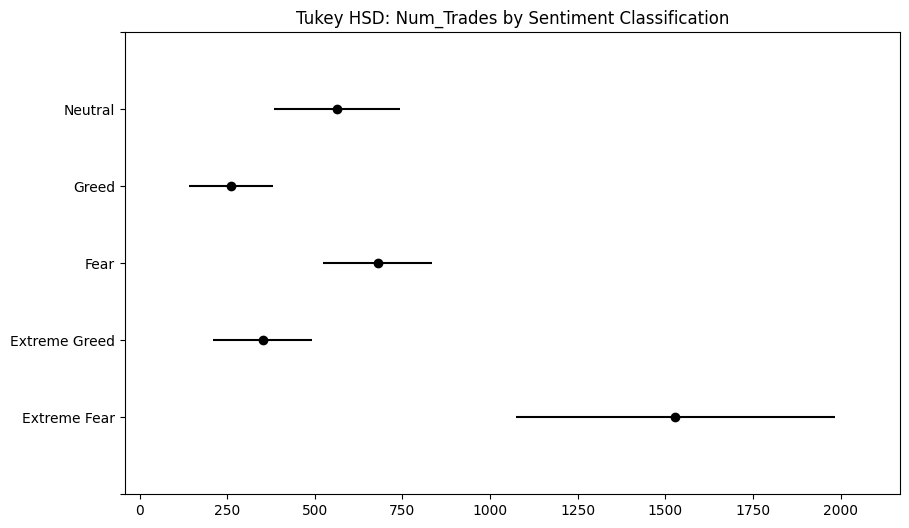

In [28]:
import matplotlib.pyplot as plt
tukey.plot_simultaneous()
plt.title("Tukey HSD: Num_Trades by Sentiment Classification")
plt.show()


In [29]:
# Tukey test for Size USD
df_tukey2 = merged_daily.dropna(subset=['Size USD', 'classification']).copy()
df_tukey2['classification'] = df_tukey2['classification'].astype(str)

tukey_volume = pairwise_tukeyhsd(endog=df_tukey2['Size USD'],
                                 groups=df_tukey2['classification'],
                                 alpha=0.05)

print(tukey_volume)


                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
    group1        group2       meandiff   p-adj      lower          upper     reject
------------------------------------------------------------------------------------
 Extreme Fear Extreme Greed -7085647.5565 0.0004 -11773390.1946 -2397904.9184   True
 Extreme Fear          Fear -2866185.8195 0.4652  -7618281.2632  1885909.6243  False
 Extreme Fear         Greed -6682201.1591 0.0007 -11263806.9552  -2100595.363   True
 Extreme Fear       Neutral -5487267.1997  0.018 -10351521.9242  -623012.4753   True
Extreme Greed          Fear  4219461.7371    0.0   1892554.7277  6546368.7464   True
Extreme Greed         Greed   403446.3974   0.98  -1551853.2713  2358746.0662  False
Extreme Greed       Neutral  1598380.3568  0.424   -949767.8235   4146528.537  False
         Fear         Greed -3816015.3396    0.0  -5920932.6443  -1711098.035   True
         Fear       Neutral -2621081.3803 0.0564  -5285765.0789  

Barplots with error bars to show how Num_Trades and Size USD vary across classifications

/tmp/ipython-input-3255297608.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=merged_daily, x='classification', y='Num_Trades', ci='sd', palette='viridis')
/tmp/ipython-input-3255297608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_daily, x='classification', y='Num_Trades', ci='sd', palette='viridis')


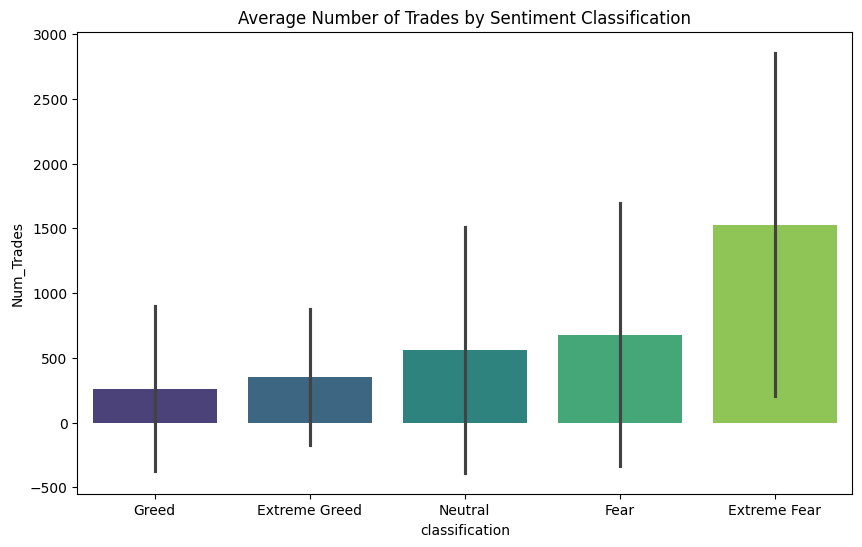

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=merged_daily, x='classification', y='Num_Trades', ci='sd', palette='viridis')
plt.title("Average Number of Trades by Sentiment Classification")
plt.show()


Bar plots for Size USD

/tmp/ipython-input-887610120.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=merged_daily, x='classification', y='Size USD', ci='sd', palette='magma')
/tmp/ipython-input-887610120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_daily, x='classification', y='Size USD', ci='sd', palette='magma')


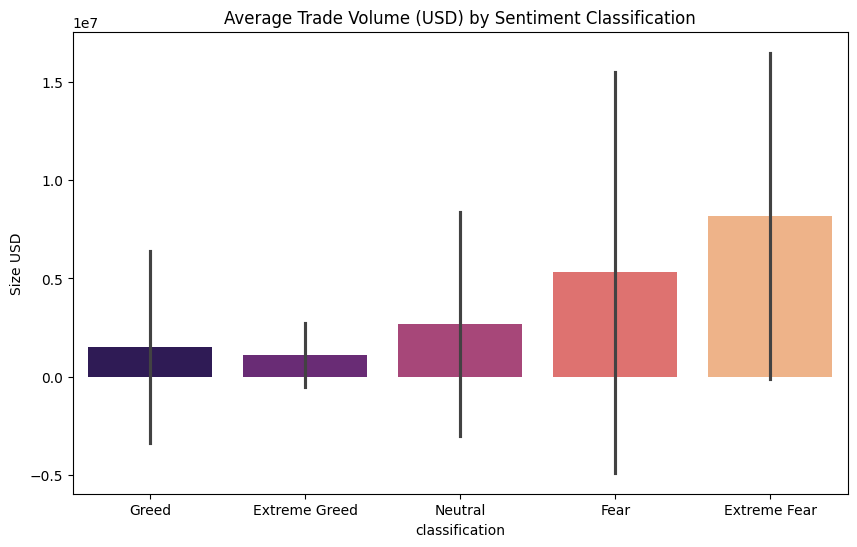

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(data=merged_daily, x='classification', y='Size USD', ci='sd', palette='magma')
plt.title("Average Trade Volume (USD) by Sentiment Classification")
plt.show()


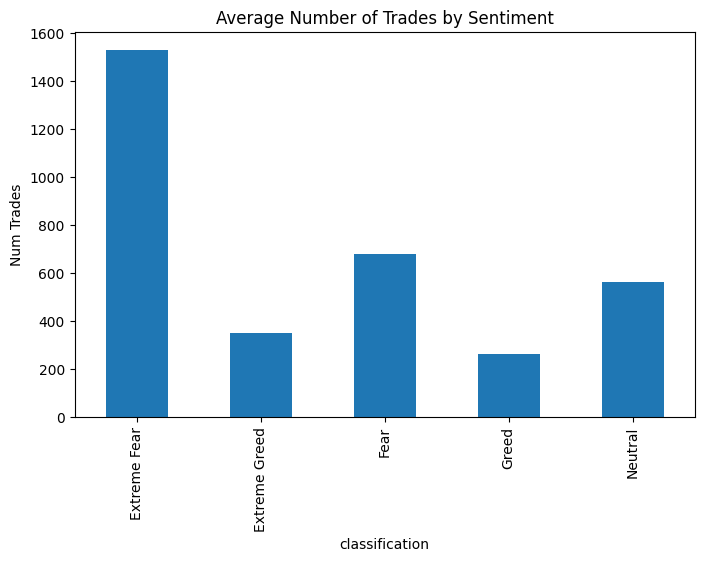

In [34]:
import os

# Create the folders if they don't already exist
os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(8,5))
merged_daily.groupby('classification')['Num_Trades'].mean().plot(kind='bar')
plt.title("Average Number of Trades by Sentiment")
plt.ylabel("Num Trades")

# Now save the plot into outputs folder
plt.savefig("outputs/avg_trades_by_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()


In [35]:
import os

# Ensure the folders exist
os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

# Save merged dataset into csv_files folder
merged_daily.to_csv("csv_files/merged_daily.csv", index=False)

print("✅ merged_daily.csv saved successfully in csv_files/")


✅ merged_daily.csv saved successfully in csv_files/


**Conclusion & Recommendations**

 Key Findings

Trading Activity & Sentiment

The number of trades and trade volumes (Size USD) are lowest during Extreme Fear and highest during Extreme Greed.

This confirms that market sentiment strongly drives trading behavior.

Profitability (Closed PnL)

No statistically significant difference in profitability was observed across sentiment states.

This suggests that while traders change how much they trade, they don’t necessarily become more profitable.

Behavioral Patterns

Traders appear to act emotionally (scaling back in fear, rushing in during greed) rather than optimizing for profit.

Neutral and mild fear states show no major difference in behavior, but extremes (Fear/Greed) create the largest shifts.

Business Implications

For Exchanges / Platforms

Expect lower liquidity and engagement in Extreme Fear → consider offering incentives, promotions, or reduced fees to maintain activity.

Monitor risk exposure in Extreme Greed → higher trade counts and volumes could increase liquidation risk.

For Traders / Strategy Designers

Be cautious of overtrading in Greed phases — higher activity doesn’t guarantee higher profits.

Consider contrarian strategies: when most traders withdraw during Extreme Fear, opportunities may arise for disciplined participants.

 Final Note

This analysis highlights that sentiment significantly impacts trading behavior (activity & volume) but not outcomes (profitability).
Recognizing these behavioral biases can help design smarter, sentiment-aware trading strategies and improve risk management in volatile crypto markets.